In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("KAG_conversion_data.csv")

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


The data used in this project is from an anonymous organisation’s social media ad campaign. The data file can be downloaded from here. The file conversion_data.csv contains 1143 observations in 11 variables. Below are the descriptions of the variables.

1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whom the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

We have two features that are variables and would be more convenient to encode them into numerical features

In [4]:
df.rename(columns = {"Total_Conversion":"Conversions"}, inplace = True)

In [5]:
def age_avg(age_range):
    
    #we split the ages into the list and then take their avgs
    
    age_list = age_range.split('-')
    
    age_mean = (int(age_list[0]) + int(age_list[1]))/2
    
    return age_mean

In [6]:
df["age"] = df["age"].apply(age_avg)

Let us check the age function results

In [7]:
df['age'].unique()

array([32., 37., 42., 47.])

Let us encode the genders:

In [8]:
def gender_encode(gender):
    # Male is 0 and Female is 1
    if gender == 'M':
        gender_num = 0
    else:
        gender_num = 1
        
    return gender_num

In [9]:
df["gender"] = df["gender"].apply(gender_encode)

In [10]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Conversions,Approved_Conversion
0,708746,916,103916,32.0,0,15,7350,1,1.43,2,1
1,708749,916,103917,32.0,0,16,17861,2,1.82,2,0
2,708771,916,103920,32.0,0,20,693,0,0.00,1,0
3,708815,916,103928,32.0,0,28,4259,1,1.25,1,0
4,708818,916,103928,32.0,0,28,4133,1,1.29,1,1


No Null values

In [11]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Conversions            0
Approved_Conversion    0
dtype: int64

<AxesSubplot:>

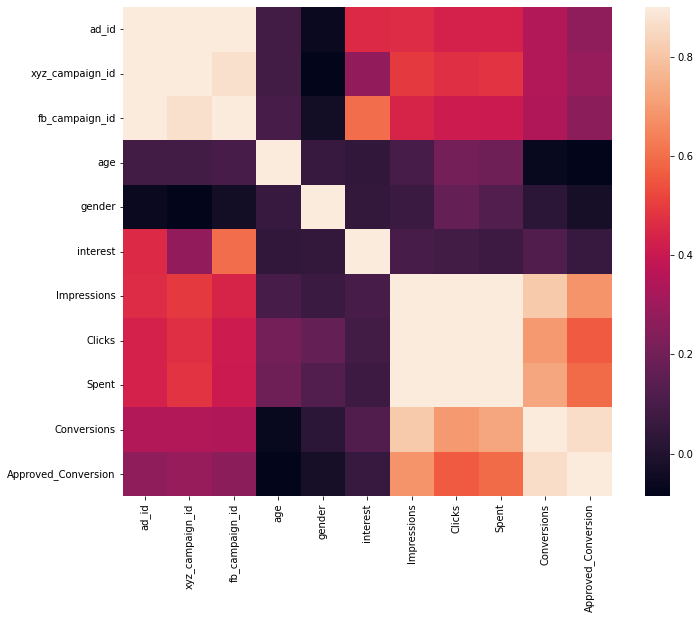

In [12]:
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

From the above heatmap we can observe that the amount of money spent is strongly correlated with the impressions  and clicks.

Approved conversions and Total conversion are correlated together, which is expected.

Impressions and Total conversions and approved conversions are correlated which is a good sign for the advertising campaigns. Customers tend to purchase products from brands that they are familiar or have been exposed to, hence the impressions implant such exposure and increases the chances of customers choosing the brand over the unfamiliar ones.

Although the heat map shows that the more we spend the more clicks and conversions we get, a hard conclusion cannot be reached from such correlations.

It is better we focus on a single campaign and dwelve deeper.
Let us choose the campaign that had the most money spent on it.

## Feature Engineering

So now we know for any Male and Female advertisement the Approved Conversion, appConv is worth C\\$129 and C$156 respectively. 

As we do not know the cost of an enquiry (Total Conversion, conv), we wil assume C$5.

We shall introduce some key metrics used in digial advertising:

**Click through rate (CTR):** 
Click through rate is a good metric to gauge how well our keywords and ads are performing. It is the percentage of impressions that are actually clicked.

A high CTR indicates that the ads are helpful and relevant to the target audience.

**Conversion rate (CR)**:
The conversion rate is the percentage of clicks that ultimately result in a conversion. The conversion depends on the ad campaign as it needs to be pre-defined, for some companies viewing a video on the website or generating an online quote could be considered a conversion.

**Cost per Click (CPC):**
This is basically the cost of each click.

**Cost per Conversion**: This is the cost for a single conversion.

**Return on Advertising Spend(ROAS):**
This is a very important metric as it is the generated revenue from a product campaign as a percentage of the advertising expenditure.
How relevant the ROAS is also depends on the type of company, some companies may not be too concerned about the revenue generated from these ad campaigns but instead wants to maximise the impressions upon their targetted audience. E.g. Luxury brands would want leave a bigger impression to maintain their status quo.    

**Cost per Mille (CPM)**: This is the cost of one thousand impressions, this is relevant for companies wanting to create huge impressions but needs to be mindful of their cost of branding.

In [13]:
def CTR(clicks,impr):
    
    ctr  = ((clicks/impr)*100)
    
    return ctr



**Click through rate (CTR):** 
We shall take the percentage of Clicks per 1000 impressions

In [14]:
df["CTR"] = (df["Clicks"]/df["Impressions"] *1000 * 100)

In [15]:
df.tail()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Conversions,Approved_Conversion,CTR
1138,1314410,1178,179977,47.0,1,109,1129773,252,358.189997,13,2,22.305366
1139,1314411,1178,179978,47.0,1,110,637549,120,173.880003,3,0,18.822083
1140,1314412,1178,179979,47.0,1,111,151531,28,40.289999,2,0,18.478067
1141,1314414,1178,179981,47.0,1,113,790253,135,198.710001,8,2,17.083137
1142,1314415,1178,179982,47.0,1,114,513161,114,165.609999,5,2,22.215250


**Conversion rate (CR)**:


In [16]:
df["CR"] = (df["Conversions"]/df["Clicks"] * 100)

**Cost per Click (CPC):**

We will divide the amount of money spent divided by the clicks to get the CPC.

In [17]:
df["CPC"] = (df["Spent"]/df["Clicks"] )

In [18]:
#let us check the correlations with our new variables

<AxesSubplot:>

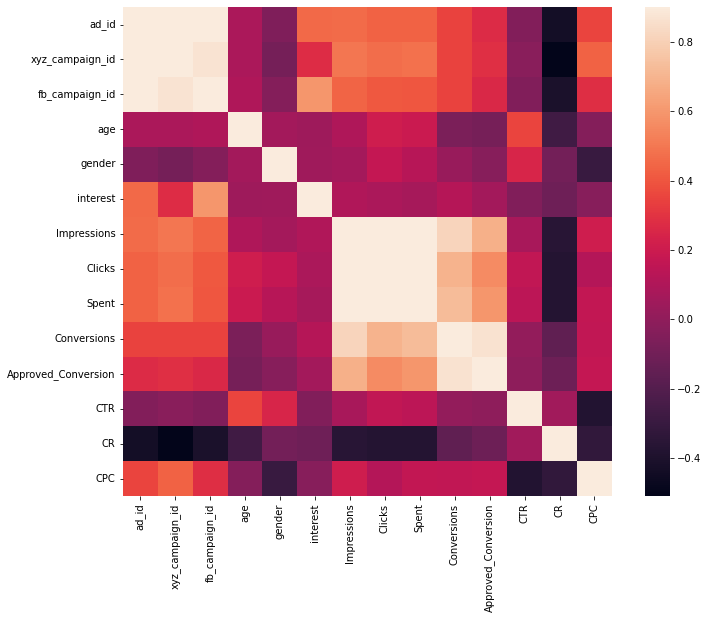

In [19]:
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

We get a strong correlation between Spent and Clicks and Impressions, which states the obvious that the more money spent on the campaign will generate more impressions hence probability of click subsequently increases.

We also notice a very slight correlation between age and click through rate, but the correlation may not be significant. 

In [20]:
#Pearson's Correlation test

from scipy.stats import pearsonr

stat, p = pearsonr(df["CTR"],df["age"])

print("stat =", stat)
print("p value is ", p)

stat = 0.3512478445133366
p value is  1.585689574054174e-34


In [21]:
df["xyz_campaign_id"].unique()

array([ 916,  936, 1178], dtype=int64)

In [22]:
df.groupby("xyz_campaign_id")["Spent"].agg('sum').reset_index()

,xyz_campaign_id,Spent
0,916,149.710001
1,936,2893.369999
2,1178,55662.149959


<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Spent'>

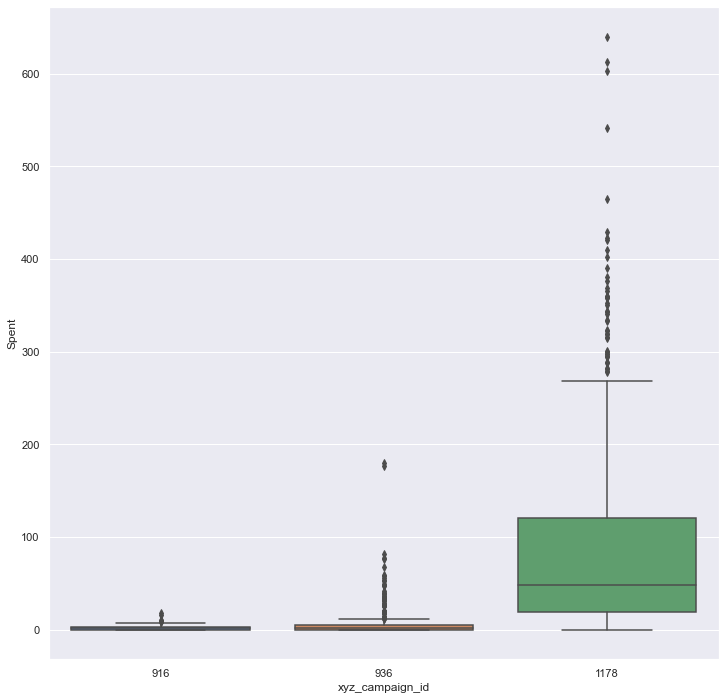

In [23]:
sns.set_theme()
fig = plt.figure(figsize = (12,12))
sns.boxplot(data=df,x = "xyz_campaign_id", y = "Spent")


We will proceed with campaign '1178' by slicing a dataframe from it.

In [24]:
df_1178 = df[df["xyz_campaign_id"] == 1178]

<AxesSubplot:xlabel='age', ylabel='Count'>

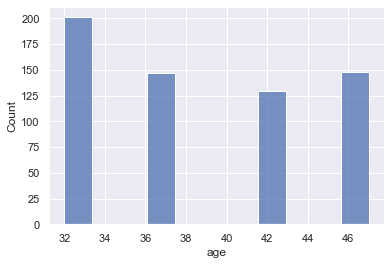

In [25]:
sns.histplot(data=df_1178, x = "age")

In [26]:
df_1178["gender_letter"] = df_1178["gender"].apply(lambda x: 'M' if x == 0 else 'F')

df_1178.head()


C:\Users\farhanhasan\AppData\Local\Temp\ipykernel_18332\976820842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1178["gender_letter"] = df_1178["gender"].apply(lambda x: 'M' if x == 0 else 'F')


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Conversions,Approved_Conversion,CTR,CR,CPC,gender_letter
518,1121091,1178,144531,32.0,0,10,1194718,141,254.049996,28,14,11.801948,19.858156,1.801773,M
519,1121092,1178,144531,32.0,0,10,637648,67,122.400000,13,5,10.507365,19.402985,1.826866,M
520,1121094,1178,144531,32.0,0,10,24362,0,0.000000,1,1,0.000000,inf,NaN,M
521,1121095,1178,144531,32.0,0,10,459690,50,86.330001,5,2,10.876895,10.000000,1.726600,M
522,1121096,1178,144531,32.0,0,10,750060,86,161.909999,11,2,11.465749,12.790698,1.882674,M


<AxesSubplot:xlabel='gender_letter', ylabel='Count'>

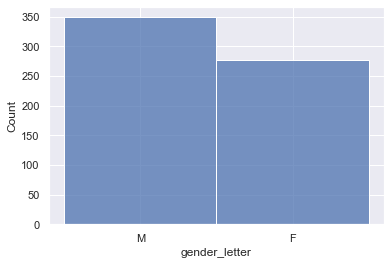

In [27]:
sns.histplot(data=df_1178, x = "gender_letter", binwidth = 1)

In [28]:
df_1178.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Conversions',
       'Approved_Conversion', 'CTR', 'CR', 'CPC', 'gender_letter'],
      dtype='object')

<AxesSubplot:xlabel='Approved_Conversion', ylabel='Count'>

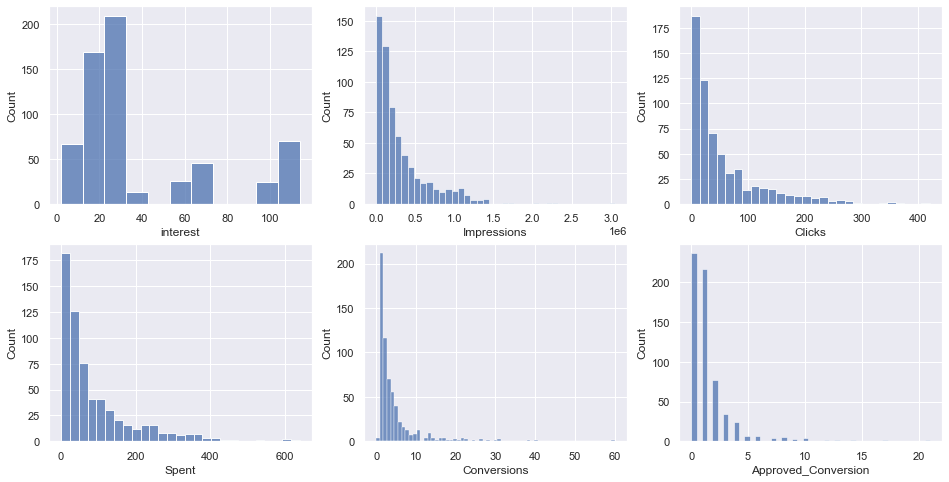

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(16,8))

sns.histplot(ax=axes[0, 0], data=df_1178, x='interest')
sns.histplot(ax=axes[0, 1], data=df_1178, x='Impressions')
sns.histplot(ax=axes[0, 2], data=df_1178, x='Clicks')
sns.histplot(ax=axes[1, 0], data=df_1178, x='Spent')
sns.histplot(ax=axes[1, 1], data=df_1178, x='Conversions')
sns.histplot(ax=axes[1, 2], data=df_1178, x='Approved_Conversion')

By looking at the campaign variable ditribution and correlations we can get an idea of what sort of questions to ask.

## Product Pricing

We dont have the actual product that is being advertised for these campaigns so we will choose a set of data from Everlane's shirt products which have both male and female catagories.


In [30]:
everlane = pd.read_csv("Everlane Prices.csv")

In [31]:
everlane.head()

,Men,Women
0,C$140,C$352
1,C$135,C$208
2,C$300,C$62
3,C$201,C$352
4,C$197,C$227


In [32]:
everlane['Men'] = everlane['Men'].str.extract(r'^C\$([0-9]*)')

everlane['Women'] = everlane['Women'].str.extract(r'^C\$([0-9]*)')

In [33]:
everlane.head()

,Men,Women
0,140,352
1,135,208
2,300,62
3,201,352
4,197,227


In [34]:
everlane.isna().sum()

Men      51
Women    12
dtype: int64

In [35]:
everlane["Men"] = pd.to_numeric(everlane["Men"], errors='coerce')

In [36]:
everlane["Women"] = pd.to_numeric(everlane["Women"], errors='coerce')

In [37]:
everlane.dtypes

Men      float64
Women    float64
dtype: object

In [38]:
everlane["Men"].fillna(everlane["Men"].mean(),inplace = True)


In [39]:
everlane["Women"].fillna(everlane["Women"].mean(),inplace = True)

In [40]:
print("Men clothes average price is ", everlane["Men"].mean())
print("Women clothes average price is ", everlane["Women"].mean())

Men clothes average price is  128.7045454545455
Women clothes average price is  156.11023622047242


We can create more variables based on our product pricing

**Total Conversions**
Total conversions = Conversions + Approved Conversions

**Conversion_Val = Conversions x C\\$5**

**Approved_Conversions_Val = Approved_Conversions x (C\\$129 for Male , C\\$156 for Women)**

**Total Conversion Val = Conversions_Val + Approved_Conversions_Val**

**Cost per Conversion  = Spent / Total Conversions**

The Final Metric is very important Return of advertising spending (ROAS)

**ROAS = Total Conversion Val / Spent**

In [41]:
df_1178["Total Conversions"] = df_1178[["Conversions","Approved_Conversion"]].sum(axis = 1)

C:\Users\farhanhasan\AppData\Local\Temp\ipykernel_18332\1323721878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1178["Total Conversions"] = df_1178[["Conversions","Approved_Conversion"]].sum(axis = 1)


In [42]:
df_1178["Conversion_Val"] = df_1178["Conversions"] * 5

C:\Users\farhanhasan\AppData\Local\Temp\ipykernel_18332\2409636850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1178["Conversion_Val"] = df_1178["Conversions"] * 5


In [43]:
def approved_conv_val(df, conv, gender):
    if gender == 0:
        conv_val = conv * 129
    else:
        conv_val = conv * 156
    return conv_val

In [44]:
df_1178["Approved_conv_val"] = df_1178.apply(lambda x: approved_conv_val(x,x["Approved_Conversion"], x["gender"]),axis=1 )

C:\Users\farhanhasan\AppData\Local\Temp\ipykernel_18332\1215082715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1178["Approved_conv_val"] = df_1178.apply(lambda x: approved_conv_val(x,x["Approved_Conversion"], x["gender"]),axis=1 )


In [45]:
df_1178.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Conversions,Approved_Conversion,CTR,CR,CPC,gender_letter,Total Conversions,Conversion_Val,Approved_conv_val
518,1121091,1178,144531,32.0,0,10,1194718,141,254.049996,28,14,11.801948,19.858156,1.801773,M,42,140,1806
519,1121092,1178,144531,32.0,0,10,637648,67,122.400000,13,5,10.507365,19.402985,1.826866,M,18,65,645
520,1121094,1178,144531,32.0,0,10,24362,0,0.000000,1,1,0.000000,inf,NaN,M,2,5,129
521,1121095,1178,144531,32.0,0,10,459690,50,86.330001,5,2,10.876895,10.000000,1.726600,M,7,25,258
522,1121096,1178,144531,32.0,0,10,750060,86,161.909999,11,2,11.465749,12.790698,1.882674,M,13,55,258


In [46]:
df_1178["Total_Conv_Val"] = df_1178[["Conversion_Val","Approved_conv_val"]].sum(axis = 1)

C:\Users\farhanhasan\AppData\Local\Temp\ipykernel_18332\2728654438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1178["Total_Conv_Val"] = df_1178[["Conversion_Val","Approved_conv_val"]].sum(axis = 1)


In [47]:
df_1178["CostperConv"] = df_1178["Spent"]/ df_1178["Total Conversions"]

C:\Users\farhanhasan\AppData\Local\Temp\ipykernel_18332\958404089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1178["CostperConv"] = df_1178["Spent"]/ df_1178["Total Conversions"]


In [48]:
#adding df_1178["Spent"]+1 to avoid infinity as ROAS value
df_1178["ROAS"] = df_1178["Total_Conv_Val"]/ (df_1178["Spent"]+1)

C:\Users\farhanhasan\AppData\Local\Temp\ipykernel_18332\3035748584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1178["ROAS"] = df_1178["Total_Conv_Val"]/ (df_1178["Spent"]+1)


Let us create a simple linear regression for the amount spent and conversions.

<AxesSubplot:xlabel='Spent', ylabel='Total_Conv_Val'>

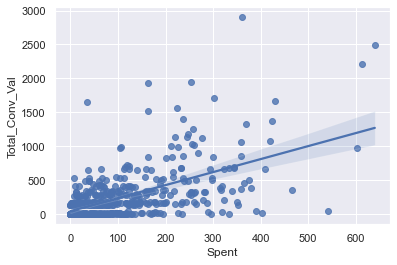

In [49]:
sns.regplot(x='Spent',y="Total_Conv_Val", data = df_1178)

With most data grouped up towards the left and with sparse data points to the right, it is difficult to say with enough confidence that higher advertising budget will result in more total conversion value.

Let us break our data for ROAS into their gender demographic for more insights.


<AxesSubplot:xlabel='gender_letter', ylabel='ROAS'>

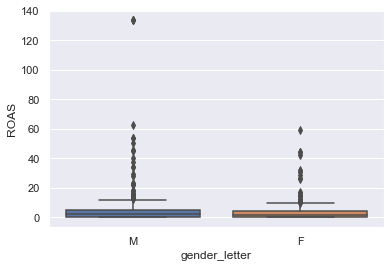

In [50]:
sns.boxplot(data = df_1178, x = "gender_letter", y = "ROAS")

The box plot shows that we need to normalize the data. A log(1+x) transformation should take care of this.

In [51]:
df_2_1178 = df_1178.copy()

df_2_1178["ROAS"] = np.log1p(df_2_1178["ROAS"])

In [52]:
df_2_1178.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Conversions,...,CTR,CR,CPC,gender_letter,Total Conversions,Conversion_Val,Approved_conv_val,Total_Conv_Val,CostperConv,ROAS
518,1121091,1178,144531,32.0,0,10,1194718,141,254.049996,28,...,11.801948,19.858156,1.801773,M,42,140,1806,1946,6.048809,2.155230
519,1121092,1178,144531,32.0,0,10,637648,67,122.400000,13,...,10.507365,19.402985,1.826866,M,18,65,645,710,6.800000,1.910083
520,1121094,1178,144531,32.0,0,10,24362,0,0.000000,1,...,0.000000,inf,NaN,M,2,5,129,134,0.000000,4.905275
521,1121095,1178,144531,32.0,0,10,459690,50,86.330001,5,...,10.876895,10.000000,1.726600,M,7,25,258,283,12.332857,1.444700
522,1121096,1178,144531,32.0,0,10,750060,86,161.909999,11,...,11.465749,12.790698,1.882674,M,13,55,258,313,12.454615,1.072031


<AxesSubplot:xlabel='gender_letter', ylabel='ROAS'>

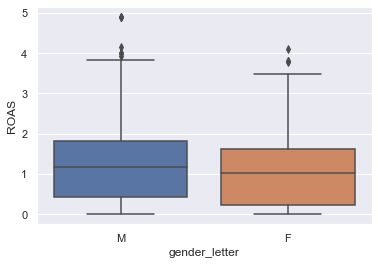

In [53]:
sns.boxplot(data = df_2_1178, x = "gender_letter", y = "ROAS")

In [54]:
ROAS_M = df_2_1178[df_2_1178["gender_letter"] == "M"]["ROAS"]

u_male = df_2_1178[df_2_1178["gender_letter"] == "M"]["ROAS"].mean()

print("Mean ROAS for Male", u_male)

Mean ROAS for Male 1.2787291268979057


In [55]:
ROAS_F = df_2_1178[df_2_1178["gender_letter"] == "F"]["ROAS"]

u_female = df_2_1178[df_2_1178["gender_letter"] == "F"]["ROAS"].mean()

print("Mean ROAS for Female", u_female)

Mean ROAS for Female 1.0705377163620702



The mean ROAS for male customers are higher than female, but is this a significant difference?

let us first quckly check the distribution curves.



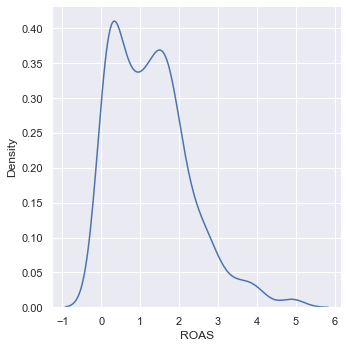

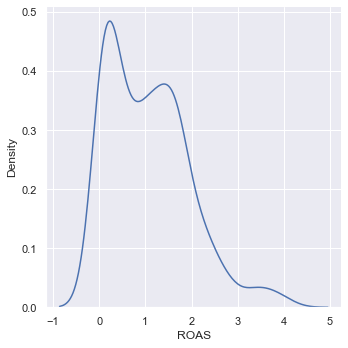

In [64]:


alpha = 0.05

sns.displot(data = ROAS_M, kind = "kde")
sns.displot(data = ROAS_F, kind = "kde")

The distribution is a bi-modal one. We should be able to use a Welch t test for significance testing.



Let us test.

**Null Hypothesis**
$$
µ_{male} = µ_{female}
$$

**Alternate Hypothesis**  
$$
|µ_{male}- µ_{female}| > 0
$$



In [56]:
from scipy import stats

stats.ttest_ind(ROAS_M, ROAS_F, equal_var = False)

Ttest_indResult(statistic=2.7813457984062384, pvalue=0.005579478833210425)

As the p-value is less than 0.05 we can reject the null and say with 95% confidence that the ROAS for Male and Female are significantly different.

Typically men and women have different interests in products hence it would make sense to look into the ROAS differences for the gender for different interests.

We shall observe the interests with highest ROAS 

In [76]:
df_2_1178.groupby("interest")["ROAS"].agg('mean').nlargest(10)

interest
101    2.116899
102    1.830959
113    1.711267
65     1.697580
104    1.608580
36     1.603729
2      1.579747
112    1.574505
15     1.529100
21     1.498380
Name: ROAS, dtype: float64

In [86]:
df_2_1178.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                    float64
gender                   int64
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Conversions              int64
Approved_Conversion      int64
CTR                    float64
CR                     float64
CPC                    float64
gender_letter           object
Total Conversions        int64
Conversion_Val           int64
Approved_conv_val        int64
Total_Conv_Val           int64
CostperConv            float64
ROAS                   float64
dtype: object

In [92]:

df_top_int = df_2_1178[df_2_1178["interest"].isin([101,102,113,65,104,36])]

In [93]:
df_top_int.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Conversions,...,CTR,CR,CPC,gender_letter,Total Conversions,Conversion_Val,Approved_conv_val,Total_Conv_Val,CostperConv,ROAS
591,1121241,1178,144562,32.0,0,36,24952,5,8.22,3,...,20.038474,60.000000,1.644000,M,5,15,258,273,1.644,3.421312
592,1121242,1178,144562,32.0,0,36,38900,3,5.58,1,...,7.712082,33.333333,1.860000,M,1,5,0,5,5.580,0.565245
593,1121243,1178,144562,32.0,0,36,53520,6,9.23,1,...,11.210762,16.666667,1.538333,M,2,5,129,134,4.615,2.646085
594,1121244,1178,144562,32.0,0,36,181683,20,34.23,2,...,11.008185,10.000000,1.711500,M,3,10,129,139,11.410,1.598478
595,1121245,1178,144562,32.0,0,36,29185,2,3.15,1,...,6.852835,50.000000,1.575000,M,1,5,0,5,3.150,0.790646


<AxesSubplot:xlabel='interest', ylabel='ROAS'>

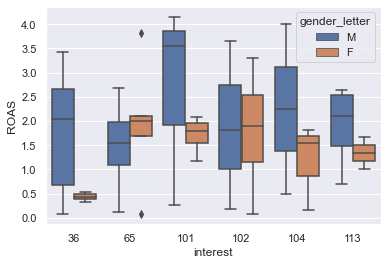

In [94]:
sns.boxplot(data = df_top_int, x = "interest", y = "ROAS", hue = "gender_letter")

## Conclusion #

This box plot shows a clearer picture of the difference in ROAS for genders for certain interests, this could help us determine which interests picque the male audience more (e.g. 101) and adjust the budget based on gender accordingly.
e.g. 101 has a huge ROAS with male audience hence we can increase the spending for male and limit the female accordingly. 

